## Image Smoothing using KNN (K-Nearest Neighbours) Algorithm

In [64]:
# Importing required libraries

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from PIL import UnidentifiedImageError
import time

In [65]:
# Defining supporting function for KNN (this will be called in knn())
    # KNN smoothing uses k nearest neighbours then computes average and assigns it's value to center pixel

# get_new_center_pixel takes 3 arguments (function is called inside convolution2d function)
# 1. local_matrix -> is local part of image under consideration (knn and averaging will be done on this)
# 2. n
# 3. k

def get_new_center_pixel(local_matrix, n, k):
    # Converting local matrix (n x n matrix under consideration)
    local_matrix = np.array(local_matrix)

    center_pixel_index = int(n/2 - 0.5)
    center_pixel = local_matrix[center_pixel_index, center_pixel_index]

    # Flattening it to convert it to 1 dimension
    local_matrix = local_matrix.flatten()

    # Subtracting center pixel value from local matrix
    diff_matrix = local_matrix - center_pixel

    # Taking absolute value (as this will be required to find nearest pixels)
    diff_matrix = abs(diff_matrix)

    # Sorting local_matrix (which has actual pixel values) according to absolute difference between pixels
    local_matrix = local_matrix[diff_matrix.argsort()]

    # Taking average of k+1 elements (first element will be center pixel always)
    # int will round off average to nearest integer
    return (np.average(local_matrix[0 : k+1 : 1]))/255


In [66]:
# Convolution function will iterate over the original image
# new_image pixels will be knn averaged pixel values

# convolution2d takes 3 arguments
# 1. image -> image frame (numpy array)
# 2. n
# 3. k

def convolution3d(image, n, k):
    y, x, z = image.shape
    y = y - n + 1
    x = x - n + 1
    new_image = np.zeros((y,x,z))
    for a in range(z):
        for i in range(y):
            for j in range(x):
                new_image[i][j][a] = get_new_center_pixel(image[i:i+n, j:j+n, a], n, k)

    return new_image

In [67]:
# knn() function takes 5 arguments (2 of them are optional)

# 1. image_path (string) - This should contain path to the image with it's extension
    # e.g. image_path = 'original_images/image1.jpg'
    # All types of images (jpg, png, etc) are supported as long as they can be read as matrices (multi dimensional)
# 2. k (int or float representation of integer) - This is the number of neighbours to consider while performing smoothing
    # k can vary from 0 to (n^2 - 1) - where n is square matrix side taken under consideration
    # k = 0 implies that only center pixel will be considered (no smoothing)

# TODO add comments for specific error when input is not appropriate


# noinspection PyBroadException
def knn(image_path, k=20, n=5, print_logs=False, save_image=True):

    # Can be used to keep track of computation time required to compute
    start_time = time.monotonic()

    # Assertions for image_path
    # Assertion to check validity of provided image path
    assert os.path.isfile(image_path) == True, 'Image Path Invalid'

    # Assertions for n
    # Theoretically n should be less than image min(image length, image width)
        # But for all practical purposes n is restricted to less than 15 (<= 15)
    # n should be integer
    assert type(n) == int or float, 'n should be integer'
    assert n == int(n), 'n should be integer'
    # Converting n to integer (e.g. 3.0 to 3)
    n = int(n)
    # n should be odd (as nxn matrix should have a center pixel)
    assert n%2 == 1, 'n should be odd. e.g. 3, 5, 7, ...'

    # Assertions for print_logs
    assert print_logs == True or print_logs == False, 'print_logs should be either True or False'

    # Assertion for save_image
    assert save_image == True or save_image == False, 'save_image should be either True or False'

    # Assertions for k
    # k provided should be integer (int) or float representation of integer
        # e.g. k can be 3 or 3.0 (2.6 will not be valid)
    assert type(k) == int or float, 'k should be integer'
    # In case k = 3.0 (float) it is converted to integer
    assert k == int(k), 'k should be integer'
    # 1 <= k <= (n^2 - 1)
    assert 0 <= k <= n**2 - 1, 'k should lie between 1 and (n^2 - 1)'
    # Converting k to integer
    k = int(k)

    # Reading the input image corresponding to path as numpy array
    try:
        image_frame = plt.imread(image_path)
    except:
        print('Error encountered while loading image\n', 'Image format might not be compatible or data corrupted')
        return

    # Printing logs
    if print_logs:
        print('Image imported successfully !\n')

        print('n = {}'.format(n))
        print('k = {}\n'.format(k))

        print('Input image size is {} x {}'.format(image_frame.shape[1], image_frame.shape[0]))
        print('Output image size will be {} x {}\n'.format(image_frame.shape[1] - (n-1), image_frame.shape[0] - (n-1)))

    # Making directory to save image (if directory already exists, then image will be stored in this dir)
    try:
        os.mkdir('images_after_knn')
    except FileExistsError:
        pass

    # Most important KNN code is as following ->
    new_image = convolution3d(image_frame, n, k)

    # Can be used to keep track of computation time required to compute
    end_time = time.monotonic()

    if print_logs:
        # round() is used to round off time to given decimal places
        print('Time Taken to compute is - {} secs'.format(round(end_time - start_time, 4)))

        plt.figure(0)
        plt.title('Original Image')
        plt.imshow(image_frame)

        plt.figure(1)
        plt.title('Image after KNN Smoothing')
        plt.imshow(new_image)



    return new_image

Image imported successfully !

n = 3
k = 5

Input image size is 640 x 360
Output image size will be 638 x 358

Time Taken to compute is - 30.219 secs


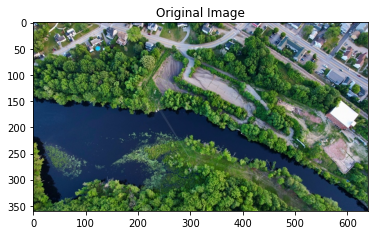

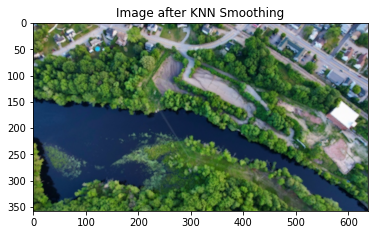

In [68]:
image_path = 'original_images/image6.jpg'

newImage = knn(image_path, n=3, k=5, print_logs=True)

In [70]:
plt.imsave('original_images/image3_new.jpg', newImage)